# **Data Analysis**

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go 
import plotly.express as px

import folium

## **Load Dataset (After Cleaning)**

In [2]:
# ambil dataset yang sudah dicleaning
pd.set_option('display.max_columns',None)

df = pd.read_csv('NYC TLC Trip Record Clean.csv')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,day,time_of_day,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone
0,2,2023-01-01 00:01:31,2023-01-01 00:16:02,1.0,166,244,1.0,2.48,16.3,1.0,0.5,3.76,0.0,1.0,18.80,1.0,1.0,0.00,871.0,Sunday,Midnight,Manhattan,Morningside Heights,Manhattan,Washington Heights South
1,2,2023-01-01 00:04:25,2023-01-01 00:17:50,1.0,255,146,1.0,2.80,16.3,1.0,0.5,2.80,0.0,1.0,18.80,1.0,1.0,0.00,805.0,Sunday,Midnight,Brooklyn,Williamsburg (North Side),Queens,Long Island City/Queens Plaza
2,2,2023-01-01 00:06:48,2023-01-01 01:08:47,1.0,129,226,2.0,7.83,52.0,1.0,0.5,0.00,0.0,1.0,54.50,2.0,1.0,0.00,3719.0,Sunday,Midnight,Queens,Jackson Heights,Queens,Sunnyside
3,2,2023-01-01 00:08:05,2023-01-01 00:13:26,1.0,41,75,6.0,1.05,5.5,0.5,0.5,1.36,0.0,0.3,6.80,1.0,1.0,0.00,321.0,Sunday,Midnight,Manhattan,Central Harlem,Manhattan,East Harlem South
4,2,2023-01-01 00:08:43,2023-01-01 00:17:08,1.0,75,140,1.0,1.99,11.4,1.0,0.5,3.33,0.0,1.0,16.65,1.0,1.0,2.75,505.0,Sunday,Midnight,Manhattan,East Harlem South,Manhattan,Lenox Hill East


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64050 entries, 0 to 64049
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               64050 non-null  int64  
 1   lpep_pickup_datetime   64050 non-null  object 
 2   lpep_dropoff_datetime  64050 non-null  object 
 3   RatecodeID             64050 non-null  float64
 4   PULocationID           64050 non-null  int64  
 5   DOLocationID           64050 non-null  int64  
 6   passenger_count        64050 non-null  float64
 7   trip_distance          64050 non-null  float64
 8   fare_amount            64050 non-null  float64
 9   extra                  64050 non-null  float64
 10  mta_tax                64050 non-null  float64
 11  tip_amount             64050 non-null  float64
 12  tolls_amount           64050 non-null  float64
 13  improvement_surcharge  64050 non-null  float64
 14  total_amount           64050 non-null  float64
 15  pa

Karena datanya baru diambil dari csv hasil generate file preprocessing. Maka harus disesuaikan kembali tipe datanya

In [4]:
df['lpep_pickup_datetime'] = df['lpep_pickup_datetime'].astype('datetime64[s]')
df['lpep_dropoff_datetime'] = df['lpep_dropoff_datetime'].astype('datetime64[s]')


In [5]:
df.describe(include='all')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,day,time_of_day,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone
count,64050.000000,64050,64050,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000,64050,64050,64050,64050,64050,64050
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,5,5,193,6,242
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,Afternoon,Manhattan,East Harlem North,Manhattan,East Harlem South
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10572,26117,38412,12927,38600,3414
mean,1.879563,2023-01-16 22:33:51,2023-01-16 22:47:30,1.052615,97.169493,137.652006,1.309930,2.768059,16.233012,0.860601,0.580773,2.193928,0.149412,0.958078,19.347573,1.375301,1.139063,0.715109,819.345168,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,1.000000,1.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.050000,1.000000,1.000000,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,2023-01-09 12:28:48,2023-01-09 12:39:57,1.000000,74.000000,74.000000,1.000000,1.220000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,11.900000,1.000000,1.000000,0.000000,444.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000,2023-01-17 09:15:05,2023-01-17 09:29:23,1.000000,75.000000,138.000000,1.000000,1.930000,12.800000,0.000000,0.500000,1.820000,0.000000,1.000000,16.100000,1.000000,1.000000,0.000000,684.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,2023-01-24 16:06:03,2023-01-24 16:19:26,1.000000,116.000000,216.000000,1.000000,3.300000,19.100000,1.000000,0.500000,3.410000,0.000000,1.000000,23.350000,2.000000,1.000000,2.750000,1028.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,2.000000,2023-01-31 23:58:23,2023-02-01 00:31:14,5.000000,263.000000,263.000000,7.000000,41.740000,455.000000,7.500000,1.500000,222.220000,36.050000,1.000000,456.000000,5.000000,3.000000,2.750000,16980.000000,NaN,NaN,NaN,NaN,NaN,NaN


## **Histogram**

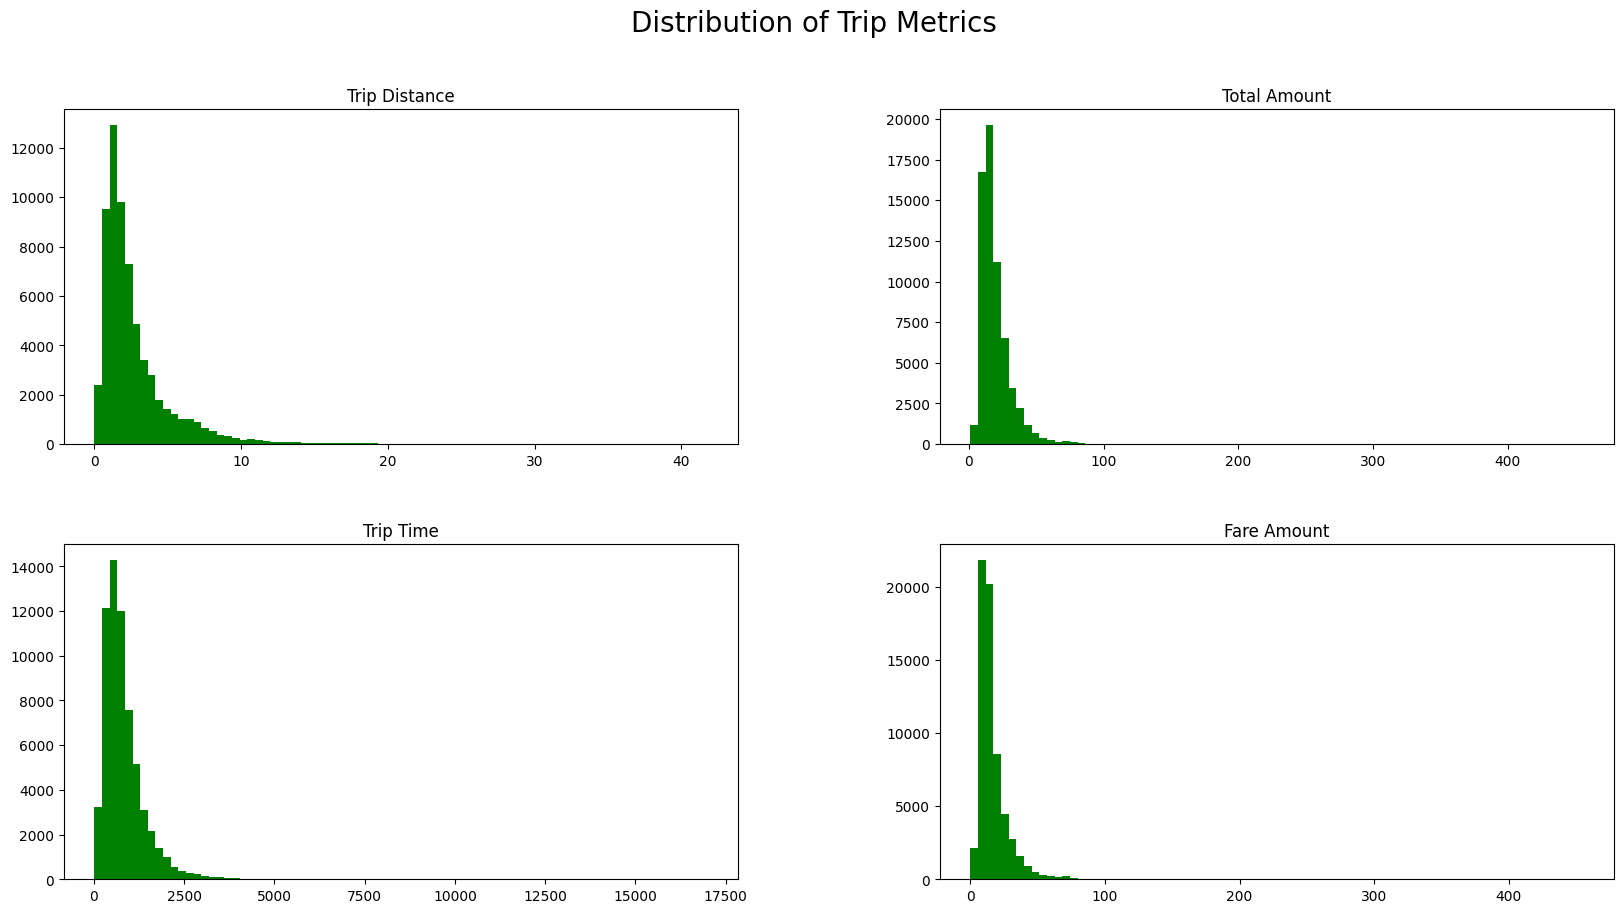

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
df[['trip_distance','total_amount','trip_time','fare_amount']].hist(figsize=(20,10),grid=False,bins=80,color='Green',ax=axes)

fig.suptitle('Distribution of Trip Metrics', fontsize=20)
axes[0, 0].set_title('Trip Distance')
axes[0, 1].set_title('Total Amount')
axes[1, 0].set_title('Trip Time')
axes[1, 1].set_title('Fare Amount');

Insight :
- Data Waktu Tempuh, Harga Total Taksi, Jarak Tempuh, Harga Taksi berdasarkan jarak dan waktu tidak terdistribusi normal (right skewed)

## **Melihat Data Outlier**

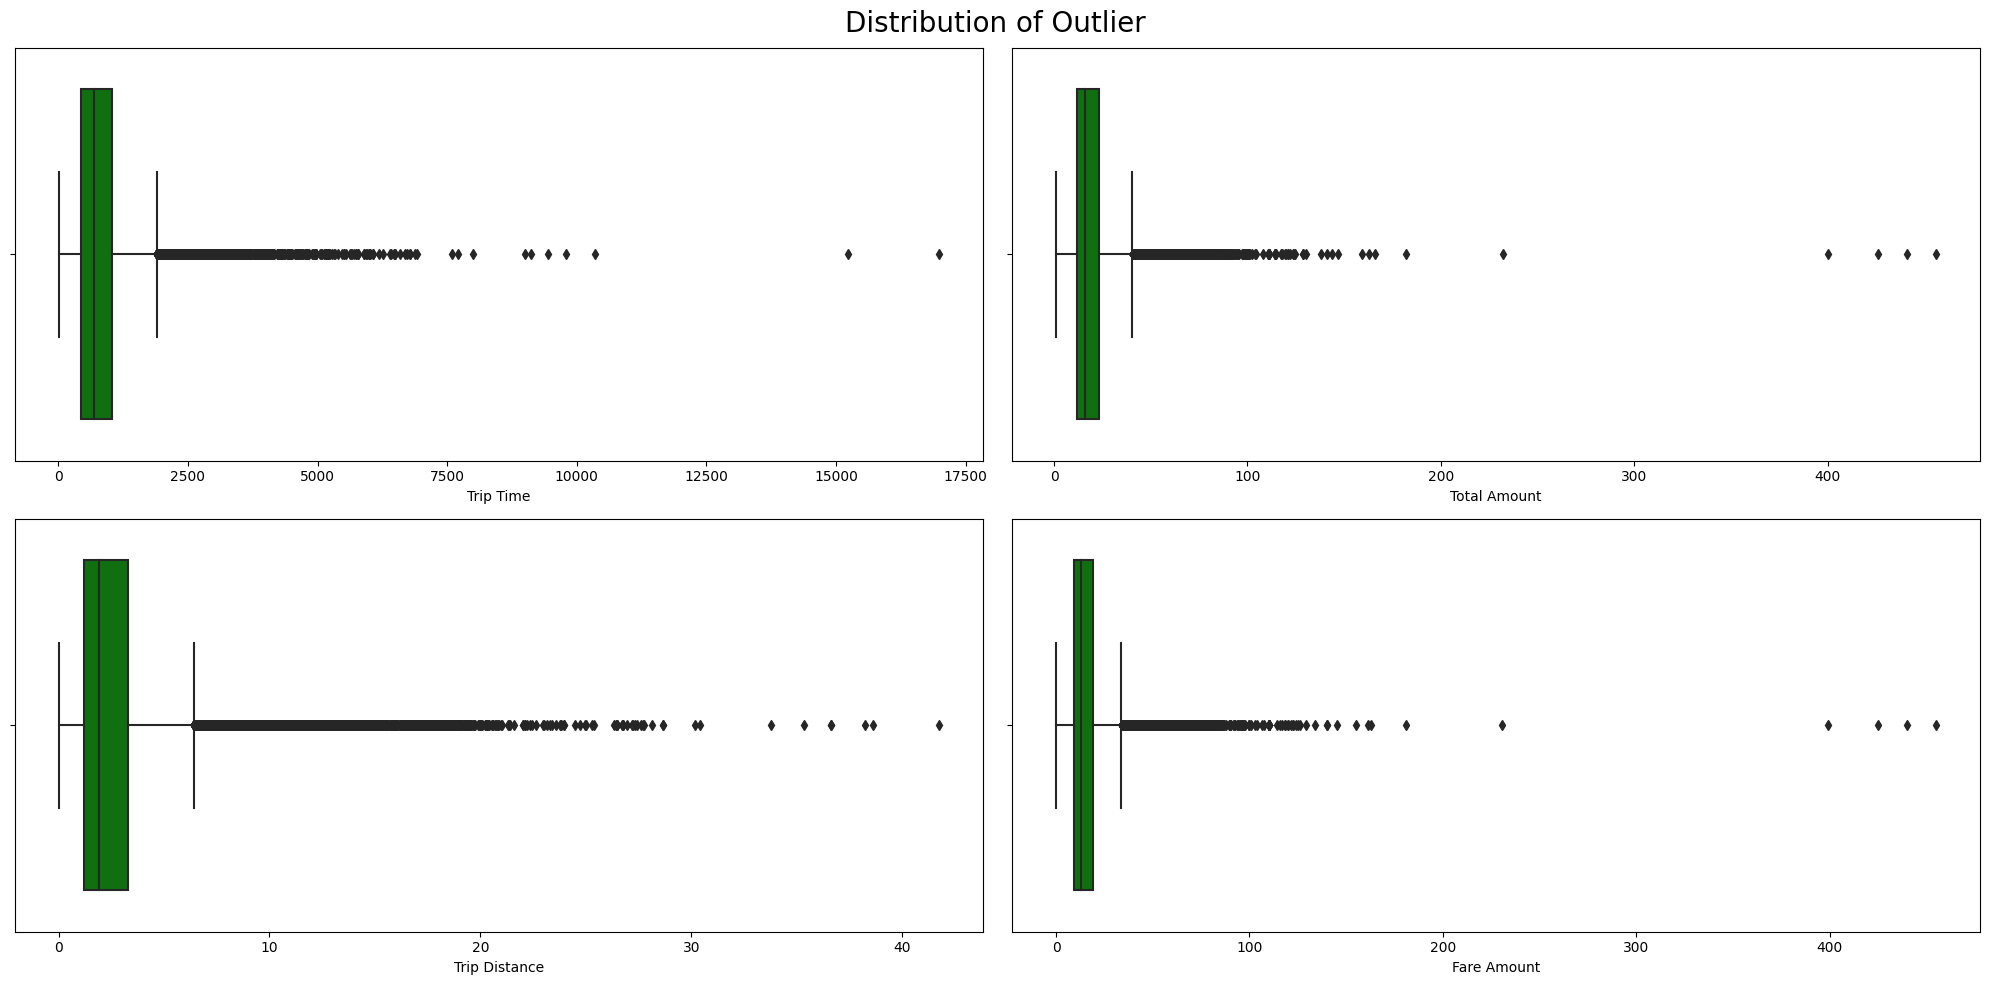

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x=df['trip_time'],color='Green')
plt.xlabel('Trip Time')
plt.subplot(2,2,2)
sns.boxplot(x=df['total_amount'],color='Green')
plt.xlabel('Total Amount')
plt.subplot(2,2,3)
sns.boxplot(x=df['trip_distance'],color='Green')
plt.xlabel('Trip Distance')
plt.subplot(2,2,4)
sns.boxplot(x=df['fare_amount'],color='Green')
plt.xlabel('Fare Amount')
plt.suptitle('Distribution of Outlier', fontsize=20)

plt.tight_layout()
plt.show()

Insight:

Untuk keempat kolom tersebut, masih banyak outlier walaupun sudah dihapus data anomalynya

In [8]:
from scipy.stats import iqr

In [9]:
lower = df['trip_time'].describe()['25%'] - 1.5*iqr(df['trip_time'])
upper = df['trip_time'].describe()['75%'] + 1.5*iqr(df['trip_time'])

print(f"Data outlier pada kolom trip_time ada {len(df[(df['trip_time']<lower) | (df['trip_time']>upper)])} yaitu yang lebih dari {upper} detik")

Data outlier pada kolom trip_time ada 3019 yaitu yang lebih dari 1904.0 detik


In [10]:
lower = df['total_amount'].describe()['25%'] - 1.5*iqr(df['total_amount'])
upper = df['total_amount'].describe()['75%'] + 1.5*iqr(df['total_amount'])

print(f"Data outlier pada kolom total_amount ada {len(df[(df['total_amount']<lower) | (df['total_amount']>upper)])} yaitu yang lebih dari {round(upper)} dollar")

Data outlier pada kolom total_amount ada 3219 yaitu yang lebih dari 41 dollar


In [11]:
lower = df['trip_distance'].describe()['25%'] - 1.5*iqr(df['trip_distance'])
upper = df['trip_distance'].describe()['75%'] + 1.5*iqr(df['trip_distance'])

print(f"Data outlier pada kolom trip_distance ada {len(df[(df['trip_distance']<lower) | (df['trip_distance']>upper)])} yaitu yang lebih dari {upper} mil")

Data outlier pada kolom trip_distance ada 5343 yaitu yang lebih dari 6.42 mil


In [12]:
lower = df['fare_amount'].describe()['25%'] - 1.5*iqr(df['fare_amount'])
upper = df['fare_amount'].describe()['75%'] + 1.5*iqr(df['fare_amount'])

print(f"Data outlier pada kolom fare_amount ada {len(df[(df['fare_amount']<lower) | (df['fare_amount']>upper)])} yaitu yang lebih dari {round(upper)} dollar")

Data outlier pada kolom fare_amount ada 4130 yaitu yang lebih dari 34 dollar


## **Melihat Frekuensi Data**

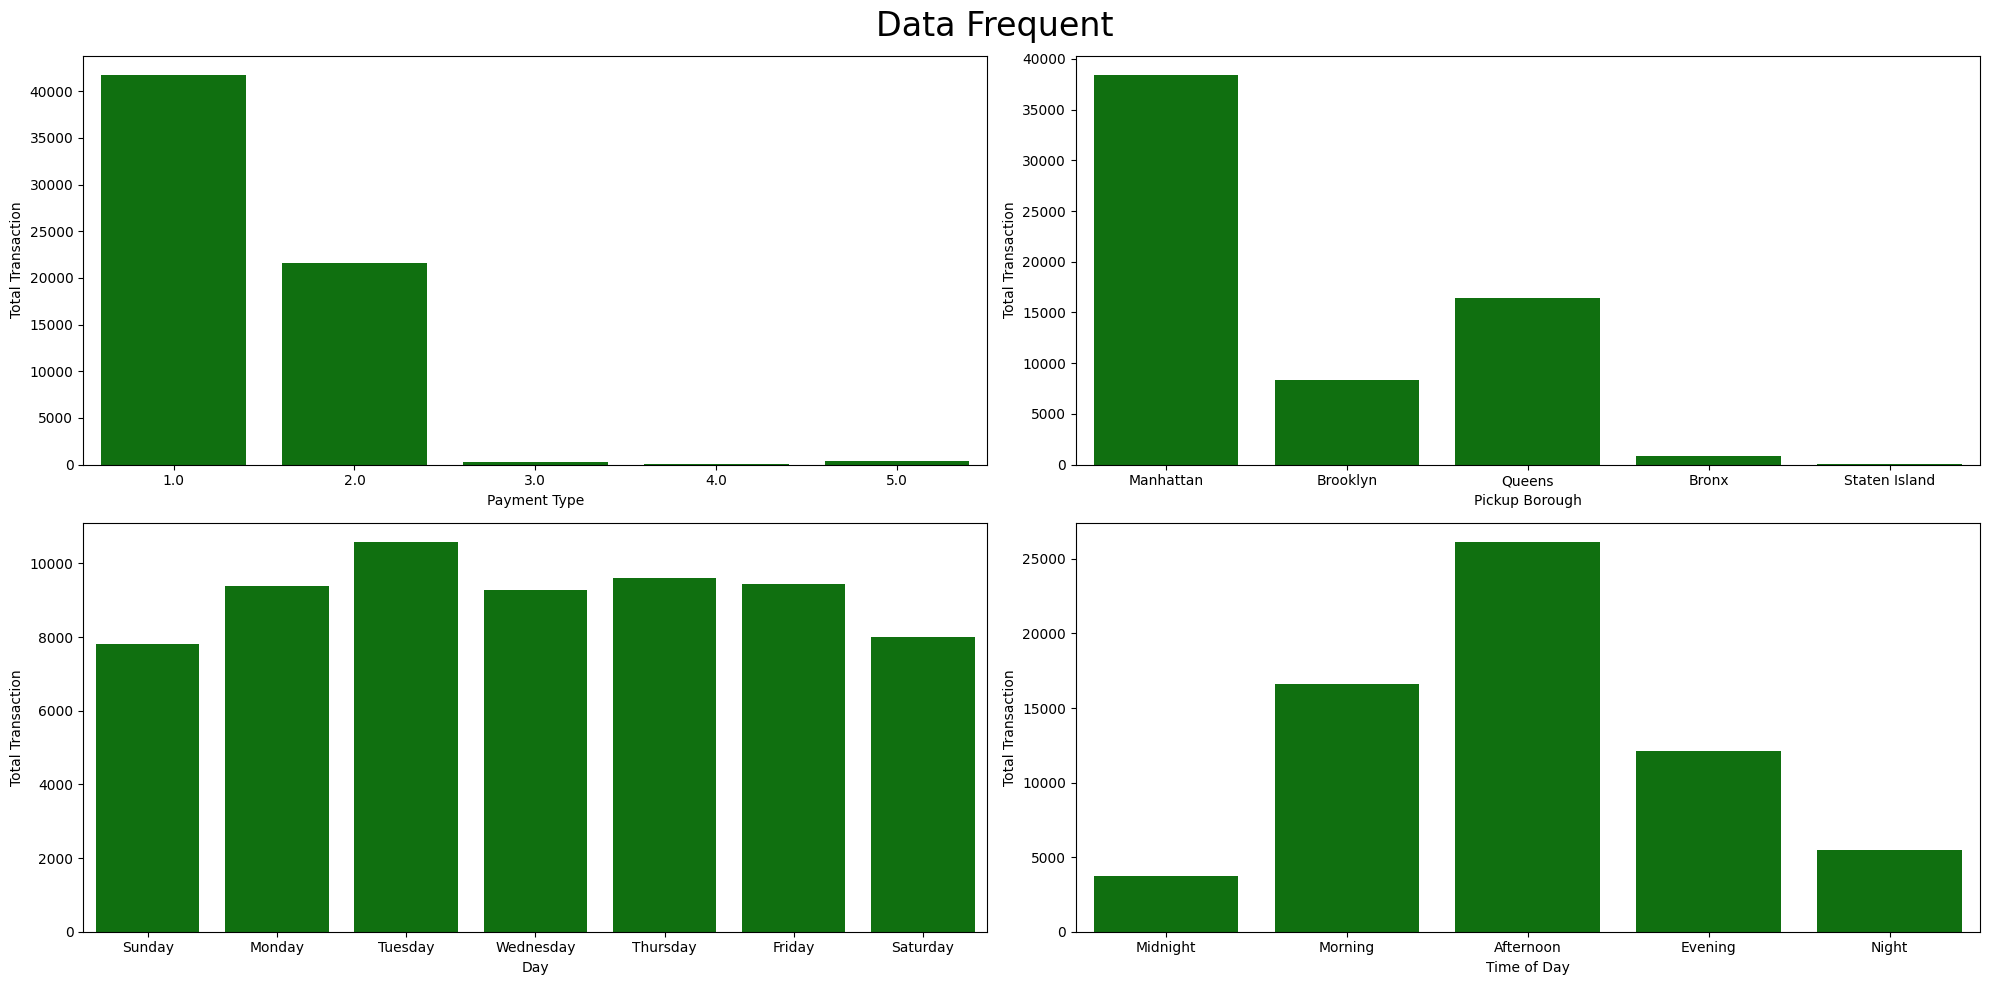

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x=df['payment_type'],y=df.index,estimator=len,color='Green')
plt.ylabel('Total Transaction')
plt.xlabel('Payment Type')
plt.subplot(2,2,2)
sns.barplot(x=df['pickup_borough'],y=df.index,estimator=len,color='Green')
plt.ylabel('Total Transaction')
plt.xlabel('Pickup Borough')
plt.subplot(2,2,3)
sns.barplot(x=df['day'],y=df.index,estimator=len,color='Green')
plt.ylabel('Total Transaction')
plt.xlabel('Day')
plt.subplot(2,2,4)
sns.barplot(x=df['time_of_day'],y=df.index,estimator=len,color='Green')
plt.ylabel('Total Transaction')
plt.xlabel('Time of Day')

plt.suptitle('Data Frequent', fontsize=24)

plt.tight_layout()
plt.show()

## **Korelasi Antara Trip Distance vs Fare Amount vs Trip Time**

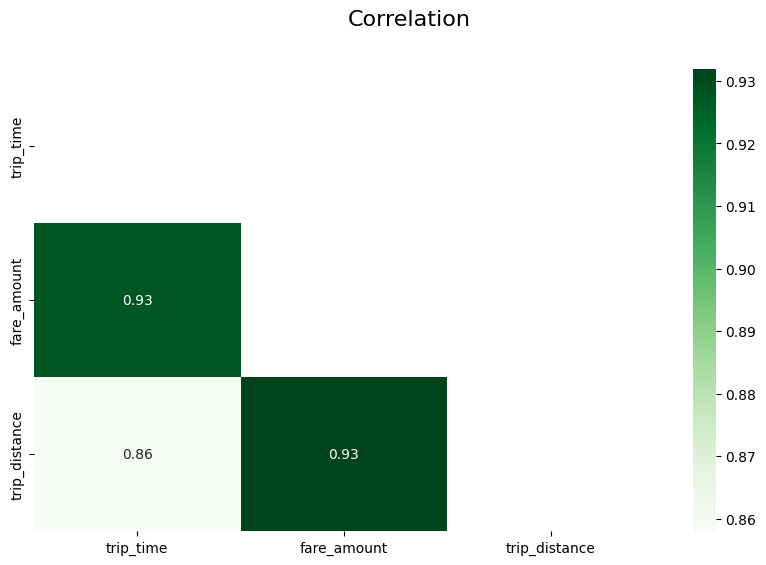

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['trip_time','fare_amount','trip_distance']].corr(method='spearman'),annot=True,cmap='Greens',mask=np.triu(df[['trip_time','total_amount','trip_distance']].corr(method='spearman')))

plt.suptitle('Correlation', fontsize=16)

plt.show()

Insight :

- Terdapat korelasi yang sangat kuat dan selaras untuk kolom trip_distance, trip_time, dan total_amount

## **Korelasi Antara Trip Distance dengan Tip Amount Untuk Pembayaran Credit Card**

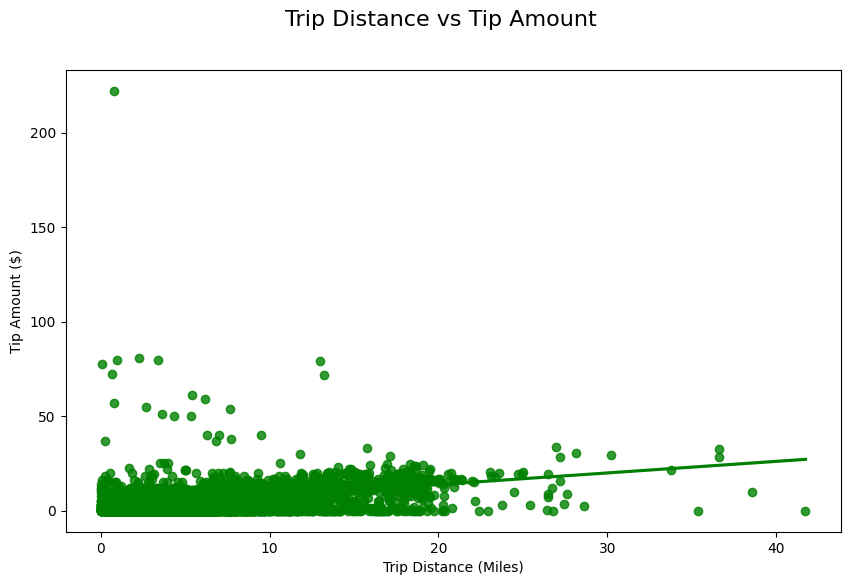

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df[df['payment_type'] == 1],x='trip_distance',y='tip_amount',color='Green')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Tip Amount ($)')
plt.suptitle('Trip Distance vs Tip Amount', fontsize=16)

plt.show()

Insight :

- Terdapat Korelasi antara trip distance dan tip amount, kita coba cek nilainya dengan fungsi corr

In [16]:
df[df['payment_type'] == 1][['trip_distance','tip_amount']].corr(method='spearman')

,trip_distance,tip_amount
trip_distance,1.000000,0.530192
tip_amount,0.530192,1.000000


Terbukti bahwa nilai memiliki korelasi dan bersifat moderate positif

## **Distribusi Fare Amount Berdasarkan Rate Code**

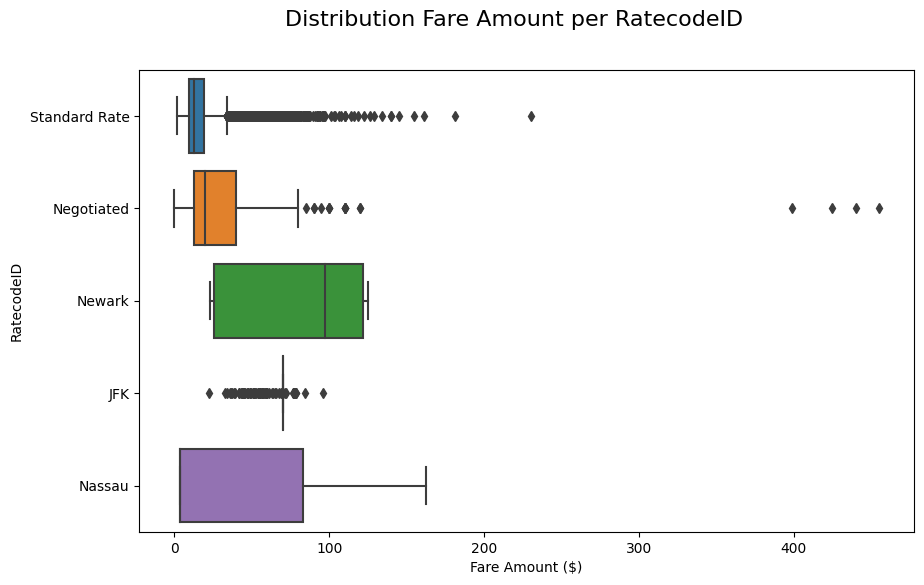

In [17]:
plt.figure(figsize=(10, 6))
df_rate = df[['fare_amount','RatecodeID']]
df_rate['RatecodeID'] = df_rate['RatecodeID'].replace({1:'Standard Rate',2:'JFK',3:'Newark',4:'Nassau',5:'Negotiated',6:'Group Ride'})
sns.boxplot(x=df_rate['fare_amount'],y=df_rate['RatecodeID'])
plt.xlabel('Fare Amount ($)')

plt.suptitle('Distribution Fare Amount per RatecodeID', fontsize=16)
plt.show();

Insight :
- Secara garis besar, Perjalanan menuju atau dari bandara memiliki rate yang lebih tinggi dibandingkan yang lain, walaupun banyak dari standard rate juga yang tinggi tapi itu terjadi mungkin karena trip distance yang tinggi

Akan dicoba dengan metode kruskal(karena data tidak terdistribusi normal) apakah tiap ratecode memiliki hubungan terhadap perubahan nilai price untuk memastikan. Tetapi karena fare_amount bergantung terhadap trip_distance dan trip_time. Maka dari itu untuk melihat hubungan antar RateCodeID, saya akan memperkecil range trip distance dan trip time agar hanya Ratecode yang berpengaruh terhadap fare_amount

    - Ho : Median Tiap Ratecode bernilai sama
    - Ha : Ada salah 1 ratecode yang memiliki median berbeda

In [18]:
from scipy.stats import kruskal

In [19]:
df['trip_distance'].median()

1.93

Kita akan coba pada trip 1.5 - 3 mil

In [20]:
df[(df['trip_distance']>1.5) & (df['trip_distance']<3)]['trip_time'].median()

731.0

Kita akan coba pada waktu 400 - 800 detik

In [21]:
df_kruskal = df[(df['trip_distance']>=1.5) & (df['trip_distance']<=3) & (df['trip_time']>=400) & (df['trip_time']<=800)][['fare_amount','RatecodeID']]
df_kruskal.groupby('RatecodeID').median()

,fare_amount
RatecodeID,
1.0,12.1
2.0,70.0
3.0,25.5
5.0,15.0


In [22]:
stat, pvalue = kruskal(
    df_kruskal[df_kruskal['RatecodeID']==1]['fare_amount'],
    df_kruskal[df_kruskal['RatecodeID']==2]['fare_amount'],
    df_kruskal[df_kruskal['RatecodeID']==3]['fare_amount'],
    df_kruskal[df_kruskal['RatecodeID']==5]['fare_amount']
)

pvalue

9.531925705538995e-13

In [23]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa minimal salah satu ratecode memiliki median yang berbeda.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa minimal salah satu ratecode memiliki median yang berbeda.
    ''')


    pvalue = 9.531925705538995e-13. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa minimal salah satu ratecode memiliki median yang berbeda.
    


## **Melihat Jumlah Transaksi Berdasarkan Hari**

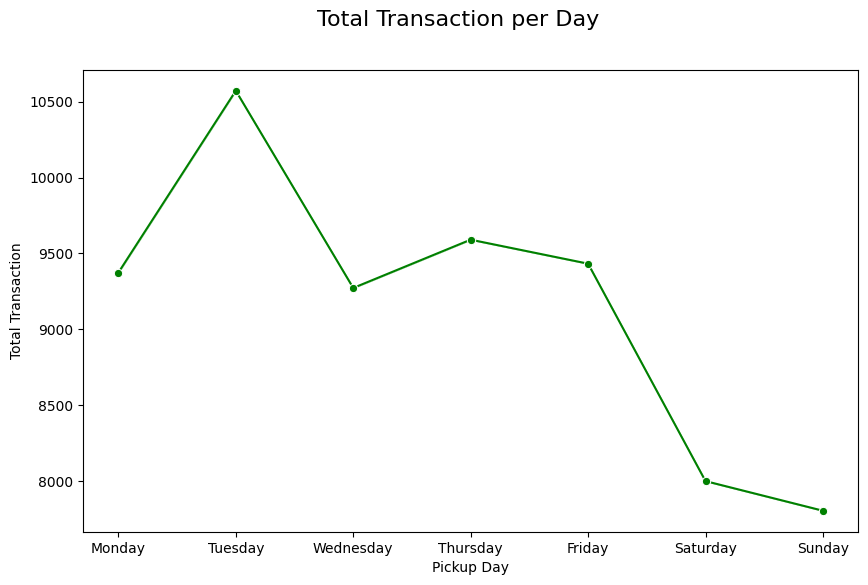

In [24]:
df_line = df[['trip_distance','total_amount','day']]
df_line

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_line['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
df_line = df_line.sort_values('day')
df_line

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_line['day'],y=df_line.index,estimator=len,marker='o',color='green')
plt.xlabel('Pickup Day')
plt.ylabel('Total Transaction')
plt.suptitle('Total Transaction per Day', fontsize=16)

plt.show();

Insight :
- Transaksi paling banyak berada pada hari selasa
- Weekday memiliki transaksi yang lebih banyak dibandingkan weekend-
- Mungkin saja dikarenakan TLC ini digunakan untuk mobilisasi bekerja

## **Melihat Median jarak tempuh Berdasarkan Hari**

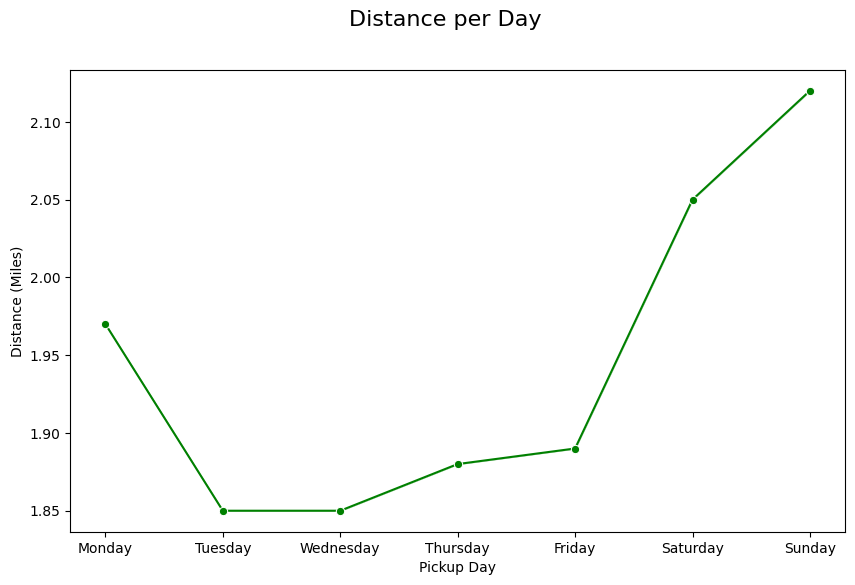

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_line['day'],y=df_line['trip_distance'],estimator=np.median,errorbar=('ci',0),marker='o',color='green')
plt.xlabel('Pickup Day')
plt.ylabel('Distance (Miles)')
plt.suptitle('Distance per Day', fontsize=16)

plt.show();

Insight :

- Jarak tempuh per transaksi untuk weekend lebih tinggi dibandingkan transaksi weekday walaupun jaraknya tidak terlalu jauh
- Jarak terbesarnya adalah pada transaksi minggu dan selasa, tetapi hanya 0.25 mil atau 400 meter

## **Penghasilan TLC Per Hari (Include Pajak dan lain lain)**

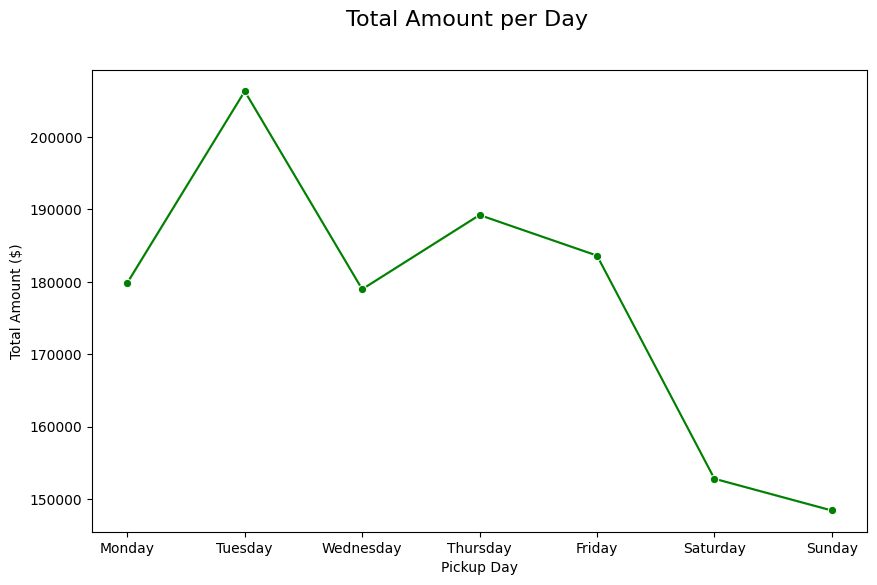

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_line['day'],y=df_line['total_amount'],estimator=np.sum,errorbar=('ci',0),marker='o',color='green')
plt.xlabel('Pickup Day')
plt.ylabel('Total Amount ($)')

plt.suptitle('Total Amount per Day', fontsize=16)

plt.show();

Insight :

- Jumlah penghasilan terbesar adalah hari selasa, selaras dengan jumlah transaksinya yang paling banyak adalah pada hari selasa

## **Jumlah Transaksi Berdasarkan Range Jam Pada Hari**

- Pagi (Morning): 06:00 - 11:59
- Siang (Afternoon): 12:00 - 17:59
- Sore (Evening): 18:00 - 20:59
- Malam (Night): 21:00 - 23:59
- Tengah Malam (Midnight): 00:00 - 05:59

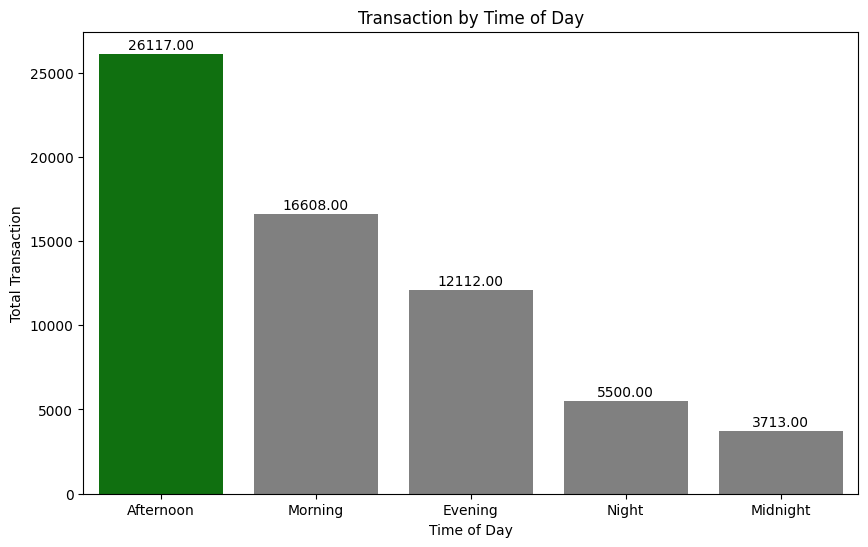

In [27]:
df_time = df.groupby('time_of_day').size().reset_index(name='count')
cols = ['grey' if (x < max(df_time['count'])) else 'green' for x in df_time['count']]
df_time = df_time.sort_values('count',ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_time['time_of_day'],y=df_time['count'],errorbar=('ci',0),palette=cols)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('Time of Day')
plt.ylabel('Total Transaction')
plt.title('Transaction by Time of Day') 

plt.show()

Insight :

- Transaksi per hari paling banyak ada pada waktu Afternoon yaitu (12.00 - 17.59)
- Dilanjutkan pagi hari yaitu (06.00 - 11.59)
- Hal ini menguatkan argumen apabila TLC digunakan untuk mobilisasi bekerja dikarenakan jam transaksi paling banyak adalah pada waktu berangkat dan pulang kerja

## **Perbandingan Berdasarkan Lokasi Penjemputan**

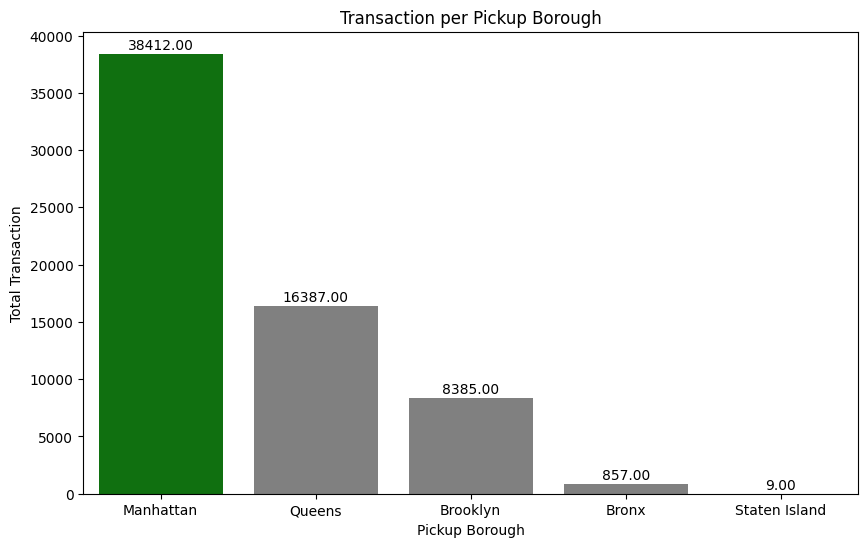

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size

df_borough = df.groupby('pickup_borough').size().reset_index(name='count')
df_borough = df_borough.sort_values('count',ascending=False)
cols = ['grey' if (x < max(df_borough['count'])) else 'green' for x in df_borough['count']]
ax = sns.barplot(x=df_borough['pickup_borough'],y=df_borough['count'],errorbar=('ci',0),palette=cols)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

plt.xlabel('Pickup Borough')
plt.ylabel('Total Transaction')
plt.title('Transaction per Pickup Borough') 

plt.show()

Insight :

- Manhattan merupakan borough yang paling padat transaksi dimana dari total transaksinya lebih dari 50% dari transaksi total yang ada pada dataset ini

## **Banyaknya transaksi per pindah borough atau tidak berdasarkan hari**

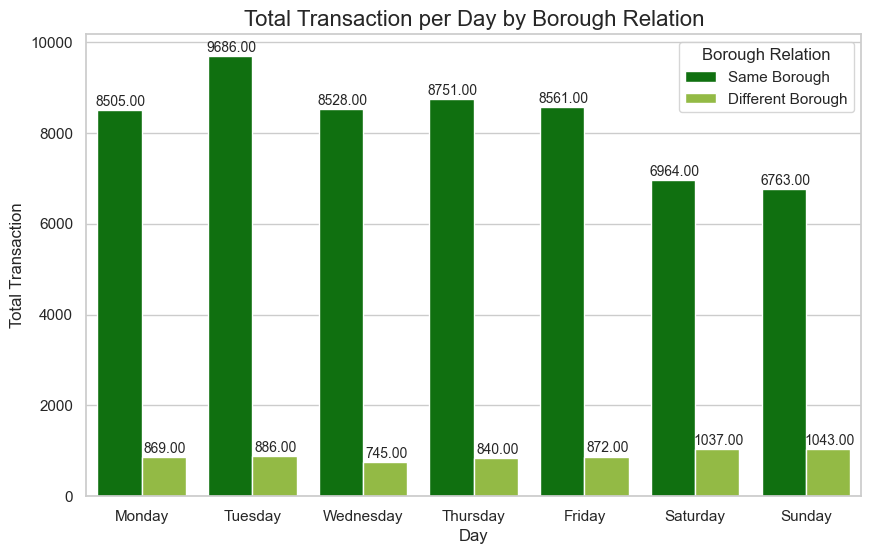

In [43]:
plt.figure(figsize = (10,6))

# menambahkan kolom untuk menentukan apakah perjalannya lintas borough atau tidak
df['borough_relation'] = df.apply(lambda row: 'Same Borough' if row['pickup_borough'] == row['dropoff_borough'] else 'Different Borough', axis=1)
palette = {
    'Same Borough': 'green',
    'Different Borough': 'yellowgreen'
}

ax = sns.barplot(x=df['day'],y=df.index,hue=df['borough_relation'],estimator=len,errorbar=('ci',0),order=day_order,palette=palette)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(1, 6),
                   textcoords='offset points')
plt.ylabel('Total Transaction')
plt.xlabel('Day')
plt.legend(title='Borough Relation')
plt.title('Total Transaction per Day by Borough Relation', fontsize=16)

plt.show();

Insight :

- Setelah divisualisasikan melalui grafik, dapat dilihat per harinya bahwa transaksinya jauh lebih banyak untuk borough yang sama
- Yang artinya, banyak transaksi yang dilakukan hanya untuk jarak pendek saja yang selaras dengan median jarak tempuh per harinya yaitu hanya 2 mil

## **Penghasilan Per Harinya Berdasarkan Pindah Zona atau Tidak**

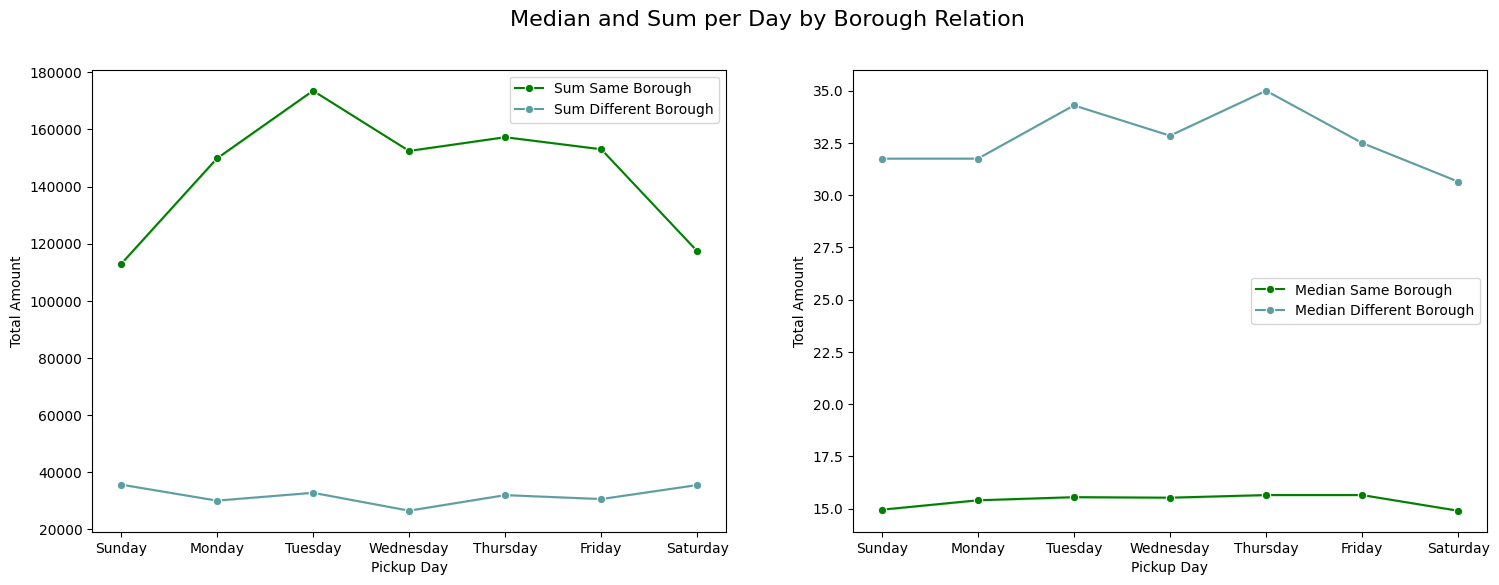

In [30]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.lineplot(x=df[df['borough_relation'] == 'Same Borough']['day'],y=df[df['borough_relation'] == 'Same Borough']['total_amount'],estimator=np.sum,errorbar=('ci',0),label='Sum Same Borough',color='green',marker='o')
sns.lineplot(x=df[df['borough_relation'] == 'Different Borough']['day'],y=df[df['borough_relation'] == 'Different Borough']['total_amount'],estimator=np.sum,errorbar=('ci',0),label='Sum Different Borough',color='cadetblue',marker='o')
plt.xlabel('Pickup Day')
plt.ylabel('Total Amount')
plt.subplot(1,2,2)
sns.lineplot(x=df[df['borough_relation'] == 'Same Borough']['day'],y=df[df['borough_relation'] == 'Same Borough']['total_amount'],estimator=np.median,errorbar=('ci',0),label='Median Same Borough',color='green',marker='o')
sns.lineplot(x=df[df['borough_relation'] == 'Different Borough']['day'],y=df[df['borough_relation'] == 'Different Borough']['total_amount'],estimator=np.median,errorbar=('ci',0),label='Median Different Borough',color='cadetblue',marker='o')
plt.xlabel('Pickup Day')
plt.ylabel('Total Amount')

plt.suptitle('Median and Sum per Day by Borough Relation', fontsize=16)

plt.show();

Insight :

- TLC banyak digunakan hanya untuk jarak dekat saja dan dalam jumlah banyak. 
- Dapat dilihat walaupun secara median total_amount, perjalanan lintas borough lebih tinggi dibandingkan borough yang sama. Tetapi untuk jumlah pemasukkan per hari lebih tinggi borough yang sama karena jumlah transaksi yang lebih banyak
- Maka dari itu armada pada konteks ini sangat berpengaruh ke penghasilan dimana apabila penghasilannya ingin tetap tinggi, maka harus mensupply demand yaitu dengan banyaknya armada. Karena memang banyak transaksi yang hanya untuk jarak pendek atau borough sama dengan harga yang lebih murah dibandingkan perpindahan borough. Tapi transaksinya hanya sedikit untuk per harinya

## **Distribusi Mobil Keluar Masuk Borough Manhattan (Borough Terpadat) Per waktu**

Karena zona yang paling banyak adalah manhattan yang merupakan lebih dari 50% dari data keseluruhan. Maka kali ini akan dicoba dilihat pergerakan mobil yang masuk dan keluar manhattan per waktunya

In [31]:
def classify_trip(row):
    if row['pickup_borough'] == 'Manhattan' and row['dropoff_borough'] != 'Manhattan':
        return 'from manhattan'
    elif row['pickup_borough'] != 'Manhattan' and row['dropoff_borough'] == 'Manhattan':
        return 'to manhattan'
    else:
        return 'not included'

# Apply the function to create the new column
df['from_to_manhattan'] = df.apply(classify_trip, axis=1)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,day,time_of_day,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,borough_relation,from_to_manhattan
0,2,2023-01-01 00:01:31,2023-01-01 00:16:02,1.0,166,244,1.0,2.48,16.3,1.0,0.5,3.76,0.0,1.0,18.80,1.0,1.0,0.00,871.0,Sunday,Midnight,Manhattan,Morningside Heights,Manhattan,Washington Heights South,Same Borough,not included
1,2,2023-01-01 00:04:25,2023-01-01 00:17:50,1.0,255,146,1.0,2.80,16.3,1.0,0.5,2.80,0.0,1.0,18.80,1.0,1.0,0.00,805.0,Sunday,Midnight,Brooklyn,Williamsburg (North Side),Queens,Long Island City/Queens Plaza,Different Borough,not included
2,2,2023-01-01 00:06:48,2023-01-01 01:08:47,1.0,129,226,2.0,7.83,52.0,1.0,0.5,0.00,0.0,1.0,54.50,2.0,1.0,0.00,3719.0,Sunday,Midnight,Queens,Jackson Heights,Queens,Sunnyside,Same Borough,not included
3,2,2023-01-01 00:08:05,2023-01-01 00:13:26,1.0,41,75,6.0,1.05,5.5,0.5,0.5,1.36,0.0,0.3,6.80,1.0,1.0,0.00,321.0,Sunday,Midnight,Manhattan,Central Harlem,Manhattan,East Harlem South,Same Borough,not included
4,2,2023-01-01 00:08:43,2023-01-01 00:17:08,1.0,75,140,1.0,1.99,11.4,1.0,0.5,3.33,0.0,1.0,16.65,1.0,1.0,2.75,505.0,Sunday,Midnight,Manhattan,East Harlem South,Manhattan,Lenox Hill East,Same Borough,not included


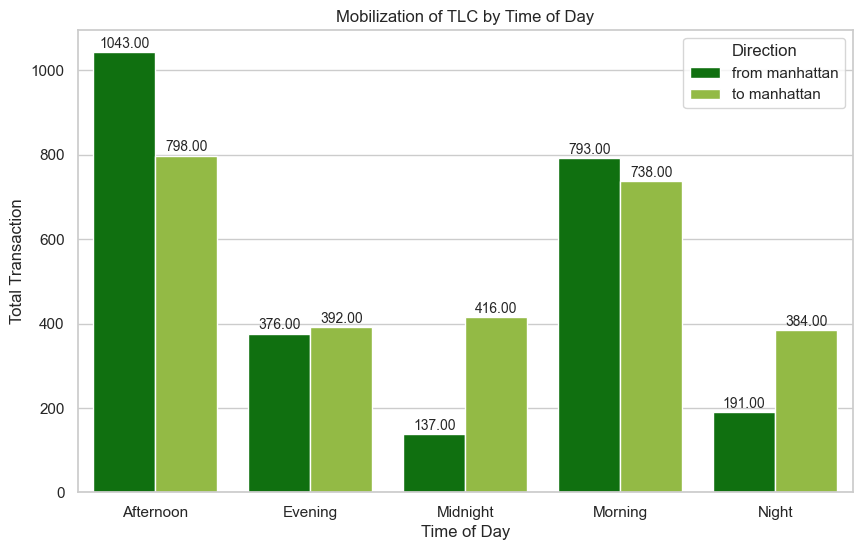

In [32]:
filtered_df = df[df['from_to_manhattan'] != 'not included']

# Group by 'time_of_day' and 'from_to_manhattan'
grouped_df = filtered_df.groupby(['time_of_day', 'from_to_manhattan']).size().reset_index(name='count')
palette = {
    'from manhattan': 'green',
    'to manhattan': 'yellowgreen'
}

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='time_of_day', y='count', hue='from_to_manhattan', data=grouped_df,palette=palette)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('Time of Day')
plt.ylabel('Total Transaction')
plt.title('Mobilization of TLC by Time of Day')
plt.legend(title='Direction')
plt.show()

Insight :
- Jumlah mobil yang masuk dan keluar manhattan di setiap waktunya kurang lebih sama kecuali pada midnight atau tengah malam
- Oleh karena itu, armada taksi untuk jam jam padat bisa tetap tinggal di tempat dropoffnya tanpa perlu kembali ke manhattan

## **Analisis Kemacetan Berdasarkan Congestion Surcharge**

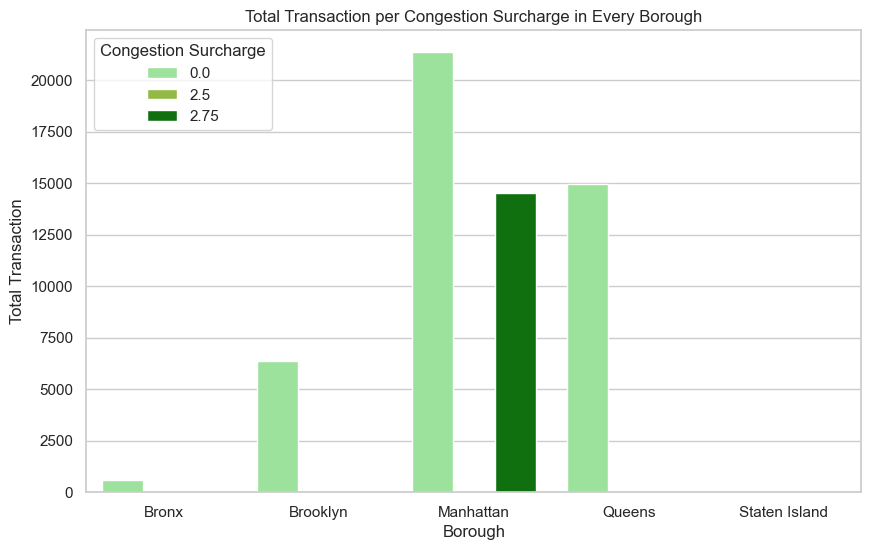

In [33]:
# Difilter agar analisis kemacetan hanya ketika pickup dan dropoff di zona yang sama
filtered_df = df[df['borough_relation'] == 'Same Borough']

grouped_df = filtered_df.groupby(['pickup_borough', 'congestion_surcharge']).size().reset_index(name='count')

palette = {
    2.75: 'green',
    2.5: 'yellowgreen',
    0:'lightgreen'
}
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_borough', y='count', hue='congestion_surcharge', data=grouped_df,palette=palette)
plt.xlabel('Borough')
plt.ylabel('Total Transaction')
plt.title('Total Transaction per Congestion Surcharge in Every Borough')
plt.legend(title='Congestion Surcharge',loc='upper left')
plt.show()

Insight :

- Kondisi kemacetan dapat dilihat berdasarkan nilai congestion surcharge bernilai 2.5 ataupun 2.75
- Dapat dilihat bahwa kemacetan yang signifikan ada pada borough manhattan dimana untuk borough lain tidak ada kemacetan atau memang hanya sedikit jumlahnya
- Hal ini selaras dengan jumlah transaksi yang banyak pada borough manhattan sehingga apabila banyak yang transaksi pada waktu yang sama akan mengakibatkan kemacetan

## **Analisis Waktu Berdasarkan Kemacetan di Manhattan (Daerah paling macet)**

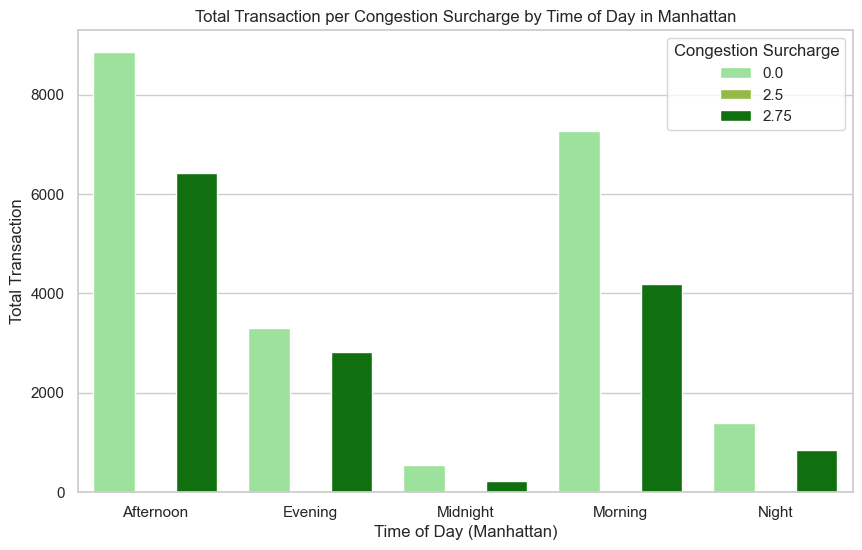

In [34]:
filtered_df = df[(df['borough_relation'] == 'Same Borough') & (df['pickup_borough'] == 'Manhattan')]

grouped_df = filtered_df.groupby(['time_of_day', 'congestion_surcharge']).size().reset_index(name='count')

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='count', hue='congestion_surcharge', data=grouped_df,palette=palette)
plt.xlabel('Time of Day (Manhattan)')
plt.ylabel('Total Transaction')
plt.title('Total Transaction per Congestion Surcharge by Time of Day in Manhattan')
plt.legend(title='Congestion Surcharge',loc='upper right')
plt.show()

Insight :

- Kemacetan tertinggi di manhattan terjadi pada waktu afternoon dan morning walaupun secara jumlah transaksi yang macet dan tidak macet masih lebih tinggi yang tidak macet untuk setiap waktu. Tetapi apabila tetap dilihat secara kuantitas congestion_surchare, maka masih bisa dikatakan bahwa untuk afternoon dan morning itu cukup sering terjadi kemacetan
- Dimana ini selaras dengan banyaknya transaksi paling banyak pada afternoon dan morning yaitu pergi dan pulang bekerja

## **Daerah Pickup terbanyak di Manhattan dengan TreeMap**

In [35]:
filtered_df = df[df['pickup_borough'] == 'Manhattan']

grouped_df = filtered_df.groupby('pickup_zone').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
fig = px.treemap(
    grouped_df,
    path=['pickup_zone'],
    values='count',
    color='count',
    color_continuous_scale='ylgn',
    width=1000,
    height=700,
    title='Most Pickup in Manhattan' 
)

fig.show()

<Figure size 1000x600 with 0 Axes>

Insight : 
- Berdasarkan treemap diatas, dapat dilihat transaksi paling banyak ada di east harlem. Itu dikarenakan east harlem adalah daerah pemukiman yang memiliki banyak populasi disana. Jadi sangat wajar apabila transaksi banyak terjadi disana

## **Kepadatan Transaksi dengan Folium**

In [36]:
df_map = df.groupby('pickup_borough').size().reset_index(name='count')
df_map


,pickup_borough,count
0,Bronx,857
1,Brooklyn,8385
2,Manhattan,38412
3,Queens,16387
4,Staten Island,9


In [37]:
# buat peta newyork

newyork_map = folium.Map(location=[40.71536549440151, -74.0057074893691],
                         zoom_start=10)

newyork_map

# choropleth
chor_borough = folium.Choropleth(geo_data=r'new-york-city-boroughs.geojson',
                  data=df_map,
                  columns=['pickup_borough','count'],
                  key_on='feature.properties.name',
                  fill_color='YlGn',
                  fill_opacity=0.8,
                  line_opacity=0.9)

borough_marker = folium.Marker(location=[40.776901885862, -73.96865736025023],
                               tooltip=df_map[df_map['count']==df_map['count'].max()]['pickup_borough'].values[0],
                               popup='Transaksi Terbanyak',)

# memasukkan choropleth ke map
chor_borough.add_to(newyork_map)
borough_marker.add_to(newyork_map)


title_html = """
<h3 align="center" style="font-size:16px"><b>Distribution of Total Transaction by Borough</b></h3>
"""

# Embed the title HTML content within the map
newyork_map.get_root().html.add_child(folium.Element(title_html))

# tampilkan
newyork_map

Insight :
- Manhattan memiliki jumlah transaksi yang paling banyak
- Macet juga terjadi karena manhattan memiliki luas daerah yang relatif kecil
- Efek dari transaksi yang banyak dan daerah yang kecil adalah macet sehingga bisa dilihat congestion_surcharge paling banyak ada pada transaksi di manhattan

## **Jenis Perjalanan**

Sesuai dengan kolom trip type dimana:
- 1 menandakan pengguna memberhentikan TLC di jalan
- 2 menandakan pengguna menggunakan aplikasi atau menelfon operator TLC untuk menjemput di lokasi penjemputan
- 3 menandakan data tidak diketahui

In [38]:
trip_type = df[['trip_type']].groupby('trip_type').size().reset_index(name='count')
trip_type

,trip_type,count
0,1.0,59260
1,2.0,673
2,3.0,4117


In [39]:

fig = go.Figure()


fig.add_trace(go.Pie(labels = ['Street-Hail','Dispatch','Unknown'], 
                     values = trip_type["count"], 
                     name  = "Trip Type",
                     marker= {'colors': ["Green","YellowGreen","LightGreen"]}),
              )


fig.update_traces(hole=0.7, hoverinfo="label+percent+name")


fig.update_layout(
    title_text="Transaction by Trip Type",
    showlegend=False,
    annotations=[dict(text="Total Transaction", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(trip_type["count"].sum()), x=0.190+0.31, y=0.55, font_size=40, showarrow=False),
                 dict(text="Dispatch", x=0.520, y=0.425, font_size=15, showarrow=False),
                 dict(text="Street-Hail", x=0.531, y=0.29, font_size=15, showarrow=False),
                 dict(text="Unknown", x=0.522, y=0.185, font_size=15, showarrow=False),
                ])


fig.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="YellowGreen",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.30, 
    x1=0.2+0.27, 
    y1=0.35,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Green",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.20, 
    x1=0.2+0.27, 
    y1=0.25,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightGreen",
)

# Show the result
fig.show()

Insight :

- Pengguna masih menggunakan TLC secara tradisional dimana memberhentikan TLC di jalan bukan menggunakan aplikasi lalu dijemput di lokasi penjemputan

## **Metode Pembayaran**

In [40]:
payment_counts = df[['payment_type']]
# selain credit card dan cash, karena jumlahnya sedikit bisa digabungkan saja menjadi 'Other'
payment_counts['payment_type'] = payment_counts['payment_type'].replace({4:3,5:3,6:3})

In [41]:
payment_ = payment_counts.groupby('payment_type').size().reset_index(name='count')
payment_

,payment_type,count
0,1.0,41725
1,2.0,21540
2,3.0,785


In [42]:

fig = go.Figure()


fig.add_trace(go.Pie(labels = ['Credit Card','Cash','Other'], 
                     values = payment_["count"], 
                     name  = "Payment Type",
                     marker= {'colors': ["Green","YellowGreen","LightGreen"]}),
              )
fig.update_traces(hole=0.7, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Transaction by Payment Type",
    showlegend=False,
    annotations=[dict(text="Total Transaction", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(payment_["count"].sum()), x=0.190+0.31, y=0.55, font_size=40, showarrow=False),
                 dict(text="Cash", x=0.501, y=0.425, font_size=15, showarrow=False),
                 dict(text="Credit Card", x=0.533, y=0.29, font_size=15, showarrow=False),
                 dict(text="Other", x=0.503, y=0.185, font_size=15, showarrow=False),
                ])

fig.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="YellowGreen",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.30, 
    x1=0.2+0.27, 
    y1=0.35,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Green",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.20, 
    x1=0.2+0.27, 
    y1=0.25,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightGreen",
)

# Show the result
fig.show()

Insight :

- Berdasarkan piechart, dapat dilihat transaksi paling banyak adalah menggunakan credit card
- Ini merupakan terobosan yang bagus dikarenakan customer sudah jarang menggunakan cash dan apabila cash pasti menyulitkan apabila ada total_amount tidak bulat dan harus ada kembalian.
- Maka dari itu pasti customer lebih menyukai membayar menggunakan credit card apabila disediakan oleh pihak penyedia jasa

# **Kesimpulan**

Kesimpulan :

- TLC Merupakan Transportasi yang sering digunakan di daerah New York
- Harga TLC yang melibatkan airport sebagai tujuan atau penjemputan lebih mahal dibandingkan standard rate.
- Terdapat korelasi yang moderate positif antara trip_distance dengan tip_amount
- Kuantitas Transaksi dan Pendapatan weekday lebih tinggi dibandingkan weekend khususnya hari selasa
- Jarak tempuh yang dilakukan per harinya kurang lebih sama
- Waktu Transaksi paling banyak ada pada afternoon (12.00 - 17.59) dan morning (06.00 - 11.59) yaitu jam berangkat dan pulang kerja
- Lokasi penjemputan paling banyak ada pada borough manhattan yang jumlah transaksinya lebih dari 50% dari keseluruhan data
- Setiap harinya, trip yang dilakukan cenderung untuk jarak pendek dikarenakan tidak sampai lintas borough
- Pendapatan dari lintas borough lebih tinggi dibandingkan borough tetap. Tetapi kuantitas transaksi lebih sedikit, jadi jumlah armada yang banyak sangat dibutuhkan karena kuantitas trip pendek sangat banyak pada waktu yang sama
- Perpindahan antara menuju manhattan dan dari manhattan untuk jam-jam padat relatif sama sehingga armada yang melakukan lintas borough bisa tetap dan menunggu customer di tempat dropoff
- Manhattan menjadi borough yang banyak mengalami kemacetan dan pada waktu berangkat dan pulang kerja dikarenakan luas manhattan yang kecil juga
- Daerah di Manhattan yang paling sering menjadi tempat penjemputan adalah East Harlem dikarenakan banyak pemukiman
- Jenis perjalanan yang dilakukan masih menggunakan metode tradisional dimana pengguna mencari TLC di jalan dibandingkan menggunakan aplikasi atau menghubungi operator TLC
- Metode Pembayaran paling sering digunakan adalah credit card, dimana lebih praktis dan pengendara tidak perlu menyiapkan kembalian

# **Saran**

Saran Untuk Bisnis :

- Memperbanyak armada pada jam padat yaitu saat berangkat kerja dan pulang kerja di weekday
- Memperbanyak armada di manhattan untuk mensupply demand yang ada dimana secara data lebih dari 50% pengguna TLC ada di manhattan
- Armada bisa tetap di tempat dropoff apabila melakukan lintas borough
- Meningkatkan harga pada jam jam padat sehingga pengguna bisa menggunakan dilain waktu seperti menunggu lebih malam untuk pulang kerja untuk mengatasi kemacetan juga
- Memberi promo atau pengurangan harga untuk weekend agar kuantitas transaksi meningkat
- Melakukan negosiasi dengan pihak credit card untuk mencari titik tengah berupa promo atau pengurangan harga agar customer selalu membayar menggunakan credit card dan kedua perusahaan tetap keuntungan
- Memperbaiki aplikasi agar pengguna lebih nyaman dan mulai menggunakan aplikasi untuk mengorder TLC sehingga kepuasan pengguna dan dari segi kuantitas pun pastinya akan meningkat.
- Lebih baik jika ada data berapa lama pengguna menunggu kendaraan bila memesan dari aplikasi. Waktu tersebut bisa diambil dari pengguna memesan sampai waktu pickoff_time agar bisa dianalisis untuk kepuasan pengguna.
- Memberikan briefing ke pengemudi agar selalu mengaktifkan dan mematikan argo pada waktu yang tepat (tidak lupa) untuk memastikan data yang diambil benar

Saran Untuk Pengambil Data :
- Perlu analisis lebih lanjut karena beberapa hal:
  - Beberapa data masih kosong jadi perlu banyak asumsi yang diambil
  - Beberapa data menimbulkan kecurigaan seperti total amount = 0, trip distance = 0, fare amount = 0, ataupun trip time yang dibawah 10 detik. Namun Payment Typenya bukan 'Voided Trip'

  
